In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [28]:
df_month7_noGeo = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/use_new_model/202271month_per_hour_noGeo_adEstimate_Tokyo_ad2zimethestimate.csv')

In [29]:
df_month7_noGeo = df_month7_noGeo[df_month7_noGeo['TOKYO_code_estimated']==533946]

In [30]:
df_month7_noGeo = df_month7_noGeo.reset_index(drop=True)

In [31]:
df_month7_noGeo["created_at"]=df_month7_noGeo["created_at"].astype(str)
created_time=df_month7_noGeo.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month7_noGeo=pd.concat([df_month7_noGeo,creatid_at_day_list],axis=1)
df_month7_noGeo=df_month7_noGeo.rename(columns={0: 'creatid_at_day'})
df_month7_noGeo=pd.concat([df_month7_noGeo,creatid_at_hour_list],axis=1)
df_month7_noGeo=df_month7_noGeo.rename(columns={0: 'creatid_at_hour'})

In [32]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [33]:
df_month7_noGeo

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,created_at,retweets,replies,likes,quote_count,author_id,username,author_followers,author_tweets,author_description,author_location,code,TOKYO_code_estimated,creatid_at_day,creatid_at_hour
0,46,46,569,80,RT : 2022-07-01 01:59:23 のおすすめのアイテムは↓ 禿防止のサプリを...,2022-07-01_01:59:58,3.0,0.0,0.0,0.0,1371788620009381892,TryPython,270.0,864448,※このアカウントはBOTになりました。,NaN,5339,533946,01,01
1,161,161,1657,187,みりほースタンバイ 時報ツイートまで約３秒です 2022/07/01 03:59:5...,2022-07-01_03:59:57,0.0,0.0,0.0,0.0,4580027352,000ms_ho,1681.0,634422,みりほーちゃんがフォロバしたユーザーが、よるほーや時報をピッタリに呟くと数秒後にピタオメリプ...,みりほーのトリセツ：詳しくは、Web見てね♪ 固定ツイートも見てね♪,5339,533946,01,03
2,163,163,1669,時々女子大生です☆〜（ゝ。∂）,上野動物園キャンパス,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5339,533946,,
3,166,166,1679,208,こちら03:59。鳥のさえずりが聞こえ始めてます。,2022-07-01_03:59:57,0.0,0.0,2.0,0.0,1416380292512706560,NARIPON_T,192.0,4064,💢VALORANT┊最高A3 現A2🔫APEX┊( ᐙ )🕹ガンエボ┊シルバー2,NaN,5339,533946,01,03
4,220,220,2361,391,たこ焼きとからあげクンな晩ご飯えびが好き♡ひじきとワカメ入りサラダ。#晩御飯 ＃晩ごはん #...,2022-07-01_04:59:54,3.0,0.0,34.0,0.0,2491409160,7717Hi,265.0,2349,好きなものを自由に。好きなことが一緒の方のフォロー大歓迎です。料理、お酒、セカオワ、vaun...,NaN,5339,533946,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,30969,30969,349991,152,おはようございます。お返事ありがとうございます。縦の三玖ちゃんを求めておりましたので今回は...,2022-07-31_08:59:58,0.0,0.0,1.0,0.0,942390297715023872,ldh_36829,146.0,772,交換垢 成人済み,NaN,5339,533946,31,08
639,31094,31094,351502,203,RT : 秋葉原駅内イベント開催中です！ HOW HOUSE PICK UP CREATOR...,2022-07-31_11:59:58,6.0,0.0,0.0,0.0,4310858292,chii_nekomatagi,338.0,112826,雑食系。面白そうなモノはまず齧ってみる。典型「熱しやすく冷めやすい」ASD系の障害手帳持ち。...,南関東のブラックホール,5339,533946,31,11
640,31144,31144,352108,321,久しぶりに青春18で東京いくのもありか・・・,2022-07-31_12:59:58,0.0,0.0,3.0,0.0,1507245180138651650,0108siHiroto,229.0,6328,京都工芸繊維大 情報工学 B1 | KMC,京都,5339,533946,31,12
641,31219,31219,352828,87,RT : やった！あかりちゃんの絵柄が入ったうちわもらいました。あとブロマイドも当選。しかも...,2022-07-31_14:59:58,1.0,0.0,0.0,0.0,1477765710663516160,yryryrmgr,40.0,6156,#ゆるゆり活動日記 をひたすら巡回するだけの非公式アカウントです。ゆる〜くやってます。,NaN,5339,533946,31,14


In [34]:
df_month7_noGeo = df_month7_noGeo[df_month7_noGeo['creatid_at_day'].isin(day_list)]
df_month7_noGeo = df_month7_noGeo[df_month7_noGeo['creatid_at_hour'].isin(hour_list)]

In [35]:
df_month7_noGeo['created_at'] = pd.to_datetime(df_month7_noGeo['created_at'],format="%Y-%m-%d_%H:%M:%S")
df_month7_noGeo = df_month7_noGeo.dropna(subset=['created_at'])

In [36]:
list_tweet_range_month7_noGeo = []
for day in day_list:
    day = int(day)
    df_perday = df_month7_noGeo[(df_month7_noGeo['created_at'].dt.day==day)]
    list_tweet_range_month7_noGeo_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month7_noGeo_per_day.append(delta)
    list_tweet_range_month7_noGeo.append(list_tweet_range_month7_noGeo_per_day)
list_tweets_count_month7_noGeo = []
for day in day_list:
    day = int(day)
    df_perday = df_month7_noGeo[(df_month7_noGeo['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month7_noGeo_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month7_noGeo_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month7_noGeo_per_hour.append(0)
    list_tweets_count_month7_noGeo.append(list_tweets_count_month7_noGeo_per_hour)
list_tweet_range_month7_noGeo = np.array(list_tweet_range_month7_noGeo)
list_tweets_count_month7_noGeo = np.array(list_tweets_count_month7_noGeo)
estimate_month7_noGeo = list_tweets_count_month7_noGeo*(3600/list_tweet_range_month7_noGeo)

In [37]:
estimate_month7_noGeo

array([[0.0000000e+00, 3.6036036e+00, 0.0000000e+00, 3.6000000e+03,
        3.6036036e+00, 0.0000000e+00, 0.0000000e+00, 3.6000000e+03,
        0.0000000e+00, 3.6036036e+00, 1.4400000e+04, 0.0000000e+00,
        3.6036036e+00, 5.4000000e+03, 0.0000000e+00, 3.6036036e+00,
        0.0000000e+00, 0.0000000e+00, 3.6036036e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.6036036e+00, 0.0000000e+00],
       [3.6036036e+00, 0.0000000e+00, 7.2000000e+03, 7.2000000e+03,
        7.2000000e+03, 3.6000000e+03, 3.6036036e+00, 0.0000000e+00,
        0.0000000e+00, 3.6036036e+00, 3.6000000e+03, 3.6036036e+00,
        3.6036036e+00, 5.4000000e+03, 3.6000000e+03, 3.6000000e+03,
        7.2000000e+03, 3.6036036e+00, 3.6000000e+03, 3.6036036e+00,
        3.6000000e+03, 0.0000000e+00, 3.6036036e+00, 3.6036036e+00],
       [5.4000000e+03, 7.2000000e+03, 3.6000000e+03, 3.6036036e+00,
        0.0000000e+00, 3.6036036e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.603603

Text(69.0, 0.5, 'hour')

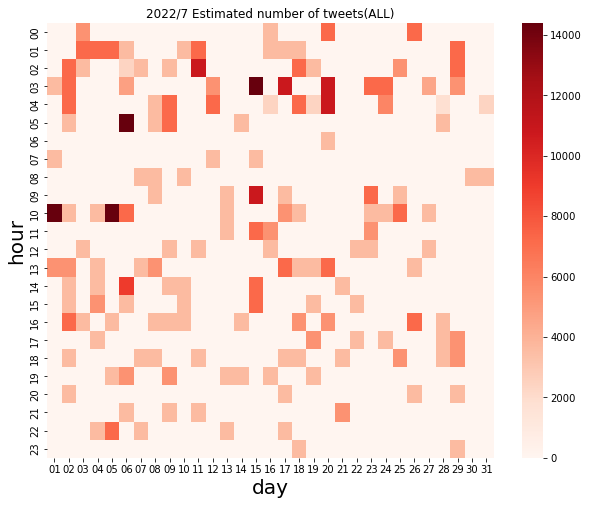

In [38]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month7_noGeo.T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(ALL)')
heatmap.set_xlabel('day',fontsize=20)
heatmap.set_ylabel('hour',fontsize=20)